In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import brute
from VectorBacktester import GeneralBacktester
import ta
import yfinance as yf


In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pyfolio as pf

In [3]:
#yf.download('BTC-USD', start='2014-01-01', end='2023-05-31')[['High','Close', 'Adj Close']].dropna(how="any")

In [4]:
smabt = GeneralBacktester('BTC-USD','2017-02-1', '2023-06-01', window1=147, window2=20*7, strategy='EMA_ATR', tcost=0.005, atr_multiplier=4)
strategy_results = smabt.run_strategy()
print("Date Range:",smabt.data.index[0], smabt.data.index[-1],"\n")
print(f'Gross Strategy {smabt.strategy} Performance with initial parameters (wind1={smabt.window1}, wind2={smabt.window2}): {strategy_results[0]*100}%')
print(f'Out-/Underperformance with initial parameters (wind1={smabt.window1}, wind2={smabt.window2}): {strategy_results[1]*100}%\n')
print(f'Asset Performance:', smabt.results['creturns'][-1]*100,"%")


[*********************100%***********************]  1 of 1 completed
Date Range: 2017-02-01 00:00:00 2023-05-31 00:00:00 

Gross Strategy EMA_ATR Performance with initial parameters (wind1=147, wind2=140): 1844.0000000000002%
Out-/Underperformance with initial parameters (wind1=147, wind2=140): -713.0%

Asset Performance: 2556.757364414681 %


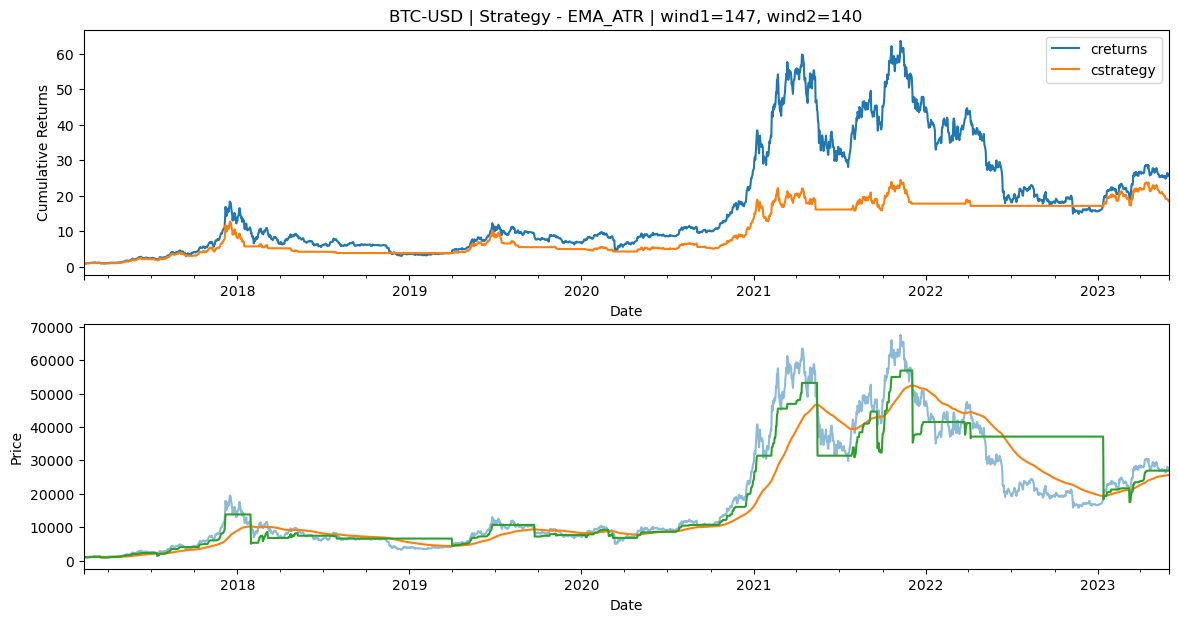

In [5]:
smabt.plot_results()

In [6]:
print(smabt.window1, smabt.window2)

147 140


Start date,2017-02-09
End date,2023-05-31
Total months,109
,Backtest
Annual return,24.931%
Cumulative returns,664.661%
Annual volatility,43.919%
Sharpe ratio,0.73
Calmar ratio,0.33
Stability,0.65
Max drawdown,-74.508%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,74.51,2017-12-16,2020-04-27,2021-01-08,800
1,34.96,2021-02-21,2021-09-30,NaT,NaN
2,34.42,2021-01-08,2021-01-31,2021-02-17,29
3,26.98,2017-06-11,2017-07-17,2017-08-05,40
4,26.64,2017-09-01,2017-09-29,2017-10-14,31


Stress Events,mean,min,max
New Normal,0.13%,-18.96%,22.51%


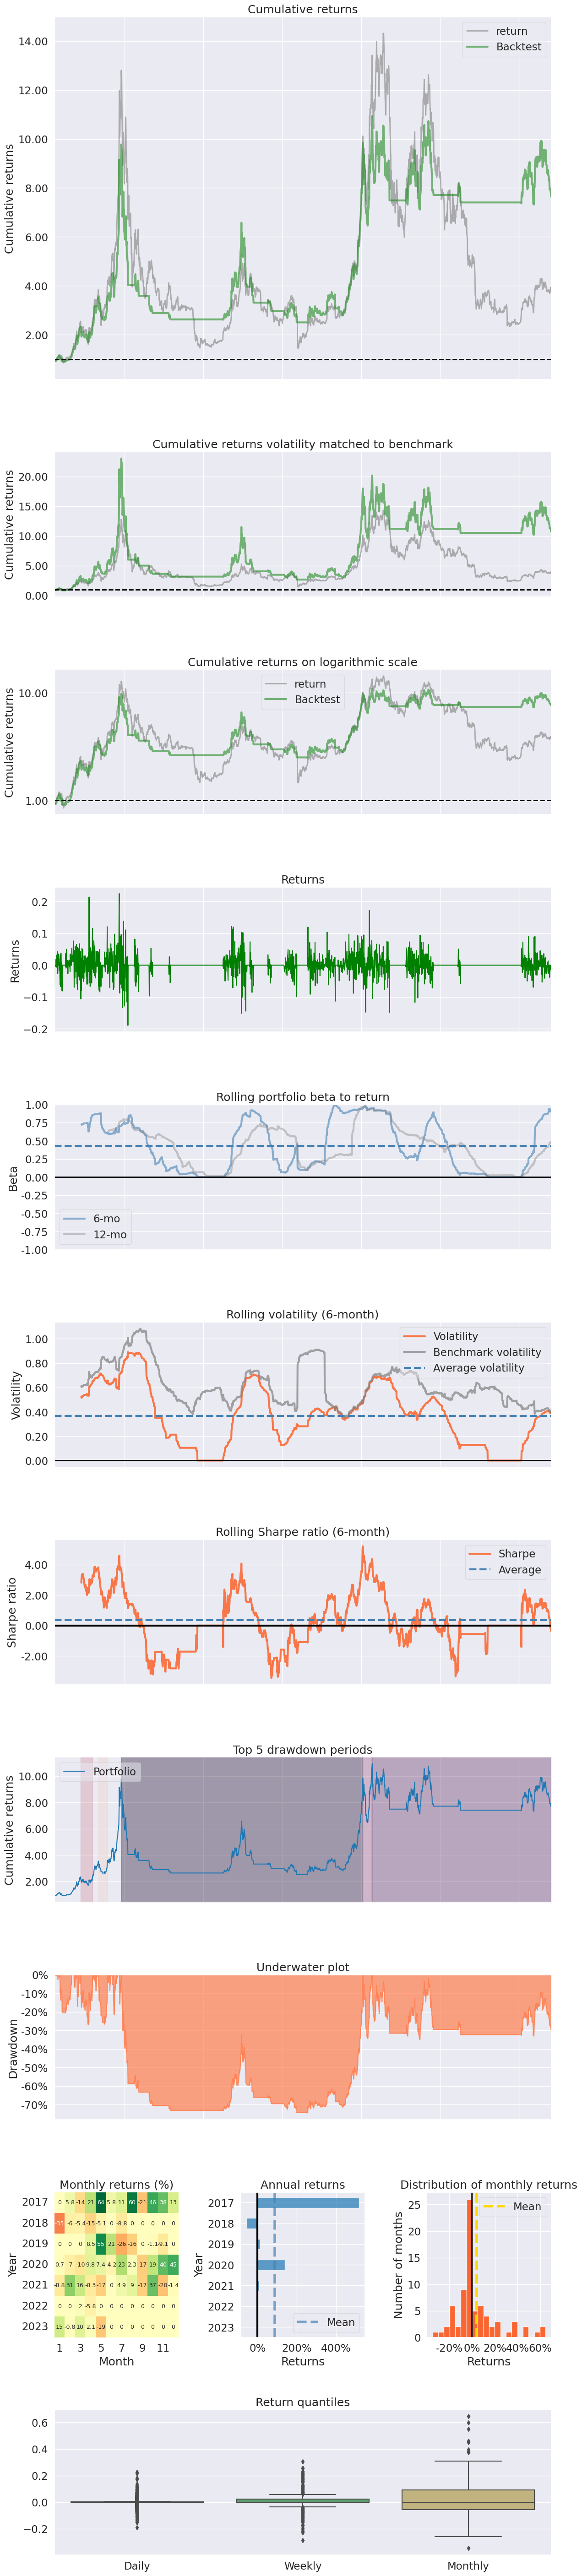

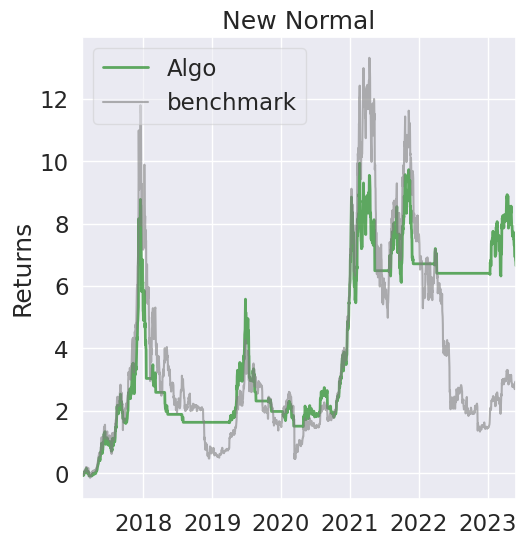

In [7]:
pf.create_full_tear_sheet(returns=smabt.results['strategy'], benchmark_rets=smabt.results['return'])

In [8]:
# Optimizing parameters
opt_results = smabt.optimize_parameters((21, 200, 4), (21, 200, 4))
print(f'{smabt.strategy} Optimal Parameters: wind1={opt_results[0][0]}, wind2={opt_results[0][1]}')
print(f'Max Performance with optimal parameters: {opt_results[1]*100}%\n')
print(f'Asset Performance:', smabt.results['creturns'][-1]*100,"%")

In [ ]:
smabt.window1

In [ ]:
smabt.results

In [ ]:
pf.create_full_tear_sheet(returns=smabt.results['strategy'], benchmark_rets=smabt.results['return'])